In [17]:
import db
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
database_entries = db.get_records(datetime.now() - timedelta(days=3), datetime.now())
# We can query through API's as well, but chose directly querying the database to reduce latencies.

2023-10-14 21:44:41.432200 2023-10-17 21:44:41.432216


In [2]:
# Printing timestamps
shadow_matrices = []
timestamps = []
for entry in database_entries:
    print(entry['timestamp'])
    shadow_matrices.append(entry['shadow-matrix'])
    timestamps.append(entry['timestamp'])

2023-10-17 11:01:52.329000
2023-10-17 16:09:22.022000
2023-10-17 16:55:56.369000
2023-10-17 17:30:00.712000


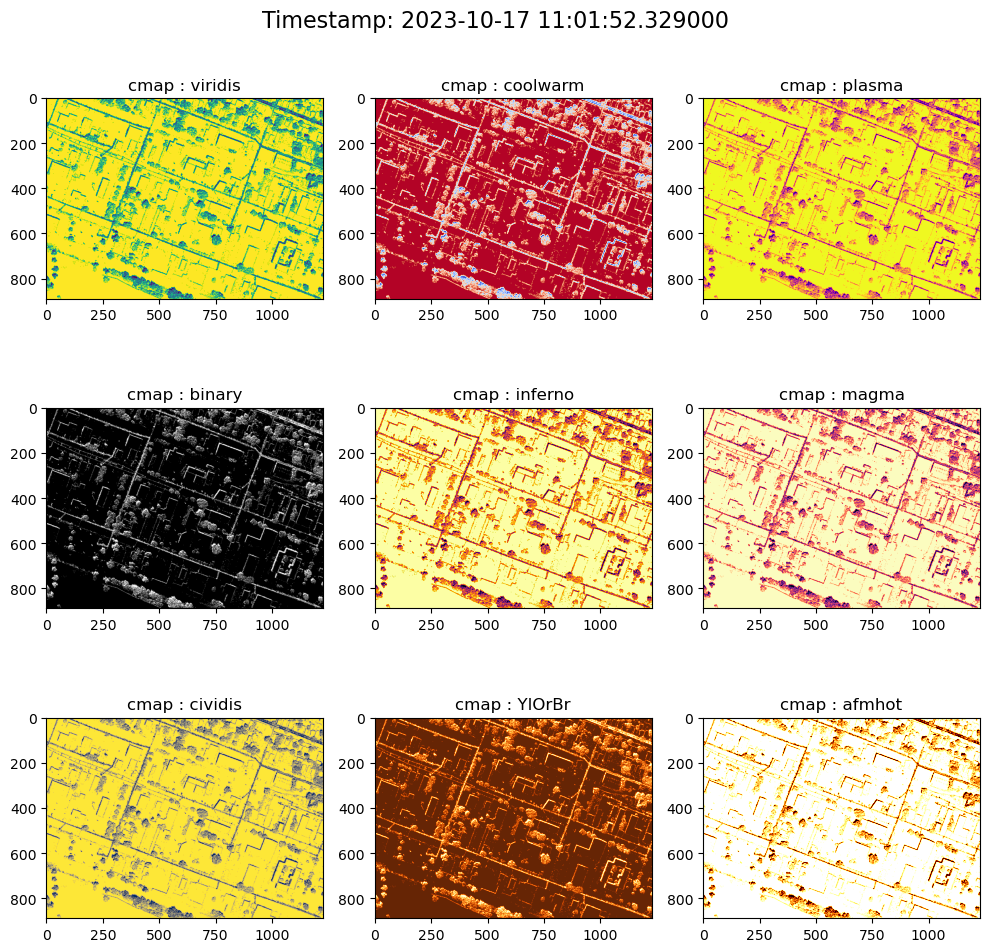

In [3]:
# Analysis on one of the shadow matrices using different cmaps
cmap = ['viridis','coolwarm','plasma','binary', 'inferno', 'magma', 'cividis', 'YlOrBr', 'afmhot']

x = np.linspace(0, 10, 100)
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
# Iterate over the datasets and plot them on the subplots
for i in range(3):
    for j in range(3):
        c = cmap[i * 3 + j]
        axs[i, j].imshow(shadow_matrices[0], cmap=c)
        axs[i, j].set_title(f'cmap : {c}')

fig.suptitle(f'Timestamp: {timestamps[0]}', fontsize=16)
plt.tight_layout()
plt.show()

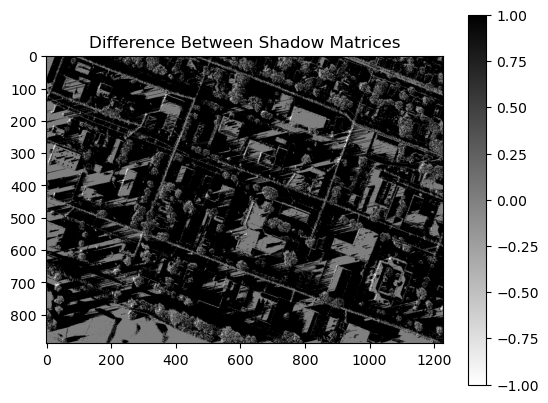

In [8]:
# Analyzing the difference between two shadow matrices
import pandas as pd
difference_matrix = pd.DataFrame(shadow_matrices[0]) - pd.DataFrame(shadow_matrices[-1])
plt.imshow(difference_matrix, cmap='binary')
plt.colorbar()
plt.title('Difference Between Shadow Matrices')
plt.show()

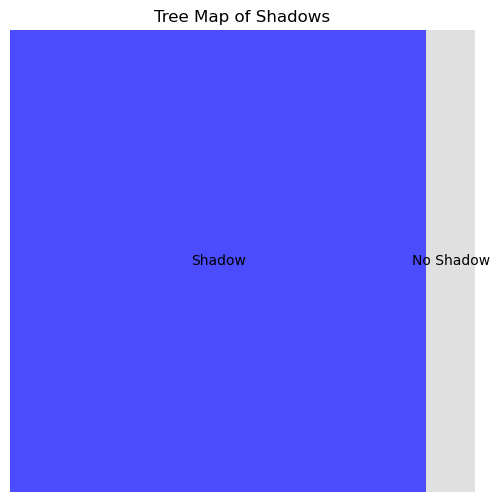

In [9]:
import squarify
# Assuming your binary array is called "shadow_data"
shadow_data = pd.DataFrame(shadow_matrices[0])
shadow_counts = shadow_data.values.sum()

# Create labels for the tree map
labels = ['Shadow', 'No Shadow']
sizes = [float(shadow_counts), float(shadow_data.size - shadow_counts)]

# Generate the tree map
plt.figure(figsize=(6, 6))
squarify.plot(sizes=sizes, label=labels, color=['blue', 'lightgray'], alpha=0.7)
plt.axis('off')
plt.title('Tree Map of Shadows')
plt.show()


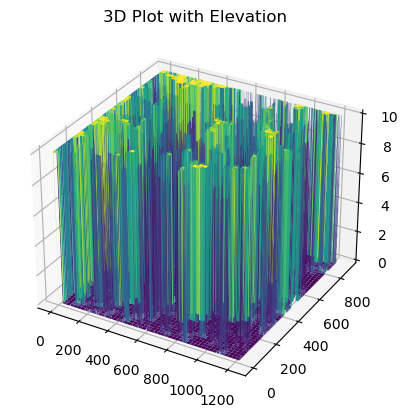

In [13]:
from mpl_toolkits.mplot3d import Axes3D
sh =  pd.DataFrame(shadow_matrices[-1])
elevation_data = sh * 10  # just to make scale of elevation evident. Wall lengths can be used here

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 1228)
y = np.arange(0, 889)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, elevation_data, cmap='viridis')
ax.set_title('3D Plot with Elevation')
plt.show()

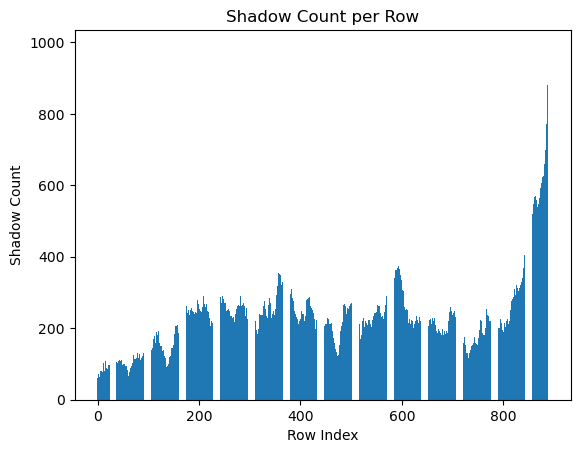

In [12]:
# Analyzing amount of shadow on each row. Basically each pixelated row in the image.
sh =  pd.DataFrame(shadow_matrices[-1])
shadow_counts = sh.sum(axis=1) 

plt.bar(range(sh.shape[0]), shadow_counts)
plt.title('Shadow Count per Row')
plt.xlabel('Row Index')
plt.ylabel('Shadow Count')
plt.show()


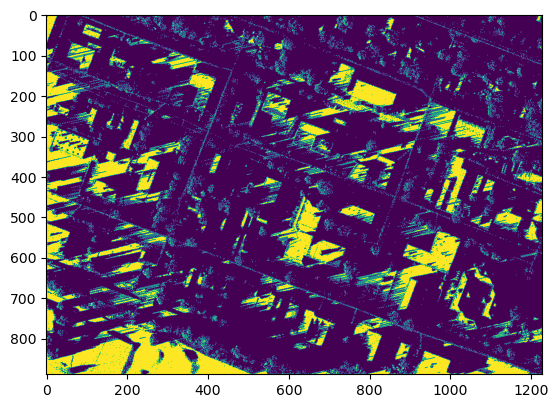

In [16]:
# Animation of shadows
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
shadow_matrix = ax.imshow(shadow_matrices[0], cmap='viridis')
def init():
    shadow_matrix.set_data(shadow_matrices[0])
    return (shadow_matrix,)

def update(i):
    shadow_matrix.set_data(shadow_matrices[i])
    return (shadow_matrix,)

anim = FuncAnimation(fig, update, frames=len(shadow_matrices), init_func=init, blit=True)

HTML(anim.to_jshtml())
# plt.show()

In [ ]:
# Future Enhancements:

# Shadow matrix is stored as is in MongoDB currently. In future, it can be zipped for lesser transfer time and lesser space usage in DB.